In [105]:
%reload_ext autoreload
%autoreload 2
from ellipsoid_mirror import *
import function as func

np.set_printoptions(threshold=20)
plt.rcParams['font.size'] = 18
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# Gaussian beam functions

ビームウェスト $w_0$ とビームウェストからの距離 $z$ からビームサイズ $w$ と曲率半径 $R$ を求める式は、
$$
\begin{align}
w(z) &= w_0 \sqrt{1 + \left(\frac{z}{z_c}\right)^2} \\
R(z) &= z\left(1 + \frac{z}{z_c}\right)^2 \\
\\
z_c &\equiv \frac{\pi w_0^2}{\lambda}
\end{align}
$$

逆にビームサイズ $w$ と曲率半径 $R$ からビームウェスト $w_0$ とビームウェストからの距離 $z$ を求める式は、
$$
\begin{align}
w_0 &= \frac{w}{\sqrt{1 + \left(\frac{\pi w^2}{\lambda R}\right)^2}} \\
z &= \frac{R}{1 + \left(\frac{\pi w^2}{\lambda R}\right)^{-2}} \\
\end{align}
$$

In [108]:
def plot_beamwaist(w0=5*mm, zmax=100*cm, freq=200*GHz, z_interval=1*mm):
    z_list = np.arange(0., zmax+z_interval, z_interval)
    
    if hasattr(freq, '__iter__'):
        wavelength = []
        w_list = []
        for _freq in freq:
            _wl = calc_wavelength(_freq)
            wavelength.append(_wl)
            w_list.append(calc_beamwaist(z_list, w0, _wl))
            pass
    else:
        wavelength = calc_wavelength(np.array(freq))
        w_list = calc_beamwaist(z_list, w0, wavelength)
        pass
    
    fig, axs = plt.subplots(1, 1, figsize=(12,4))
    axs.set_xlabel('Distance $z$ [cm]')
    axs.set_ylabel('Beam size $w$ [cm]')
    axs.grid(True)
    
    if hasattr(freq, '__iter__'):
        for i, _freq in enumerate(freq):
            theta_far = np.rad2deg(farfield_angle(w0, wavelength[i]))
            _label = r'$\theta_{\rm far}$'+f' = {theta_far:.1f} deg @ {_freq/GHz:.0f} GHz'
            axs.plot(z_list/cm, w_list[i]/cm, label=_label)
            pass
    else:
        w3dB = waist_to_halfwaist(w_list[-1])
        theta = np.rad2deg(np.arctan(w_list[-1]/z_list[-1]))
        theta3dBhalf = 2.*np.rad2deg(np.arctan(w3dB/z_list[-1]))
        theta_far = np.rad2deg(farfield_angle(w0, wavelength))
        print(waist_to_halfwaist(theta))
        _label = r'$\theta_{\rm waist}$'+f' = {theta:.1f} deg' + '\n' \
                    + r'$\theta_{\rm 3dB}/2$'+f' = {theta3dBhalf:.1f} deg' \
                    + r'$\theta_{\rm far}$'+f' = {theta_far:.1f} deg'
        axs.plot(z_list/cm, w_list/cm, label=_label)
        pass
    
    axs.legend(frameon=False)
    fig.tight_layout()
    
    return 0


def plot_R(w0=5*mm, zmax=100*cm, freq=200*GHz, z_interval=1*mm):
    z_list = np.arange(0., zmax+z_interval, z_interval)
    
    if hasattr(freq, '__iter__'):
        wavelength = []
        R_list = []
        for _freq in freq:
            _wl = calc_wavelength(_freq)
            wavelength.append(_wl)
            R_list.append(calc_R(z_list, w0, _wl))
            pass
    else:
        wavelength = calc_wavelength(np.array(freq))
        R_list = calc_R(z_list, w0, wavelength)
        pass
    
    
    fig, axs = plt.subplots(1, 1, figsize=(12,4))
    if hasattr(freq, '__iter__'):
        for i, _freq in enumerate(freq):
            axs.plot(z_list/cm, R_list[i]/cm, label=f'{_freq/GHz:.0f} GHz')
            #print(R_list[i])
            pass
    else:
        axs.plot(z_list/cm, R_list/cm, label=f'{freq/GHz:.0f} GHz')
        pass
    axs.legend(frameon=False)
    axs.set_xlabel('Distance $z$ [cm]')
    axs.set_ylabel('Curvature $R$ [cm]')
    axs.grid(True)
   
    
    fig.tight_layout()
    return 0


3.213437340047606


0

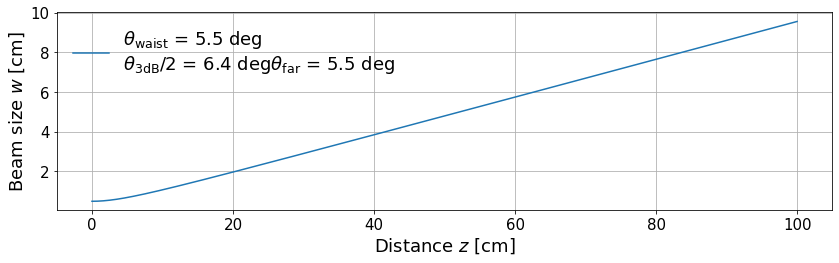

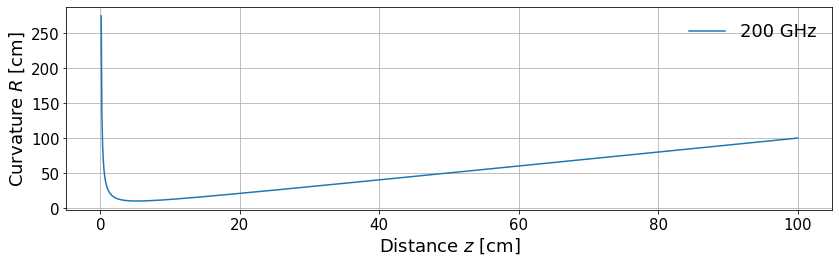

In [109]:
plot_beamwaist(w0=5*mm, zmax=100*cm, freq=200*GHz)
plot_R(w0=5*mm, zmax=100*cm, freq=200*GHz)

0

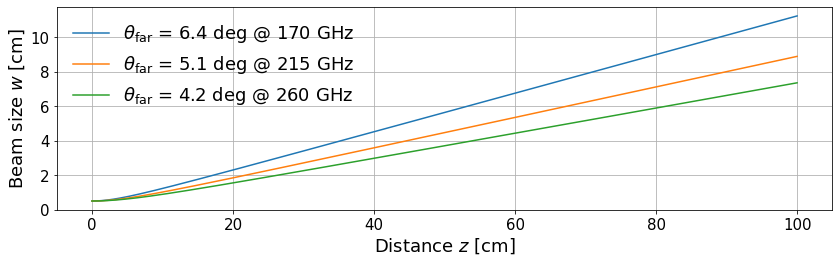

In [110]:
plot_beamwaist(w0=5*mm, zmax=100*cm, freq=[170*GHz, 215*GHz, 260*GHz])

# Parabola drawing

In [111]:
def parabola(a=1.0, xmin=-10, xmax=10):
    x = np.linspace(xmin, xmax, 1000)
    y = a * np.power(x, 2.)

    return x, y

def plot_parabola(x, y):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.grid()
    ax.set_title(f'Parabola', fontsize=16, zorder=1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.plot(x, y, c='red')
    return fig, ax

(-10.0, 40.0)

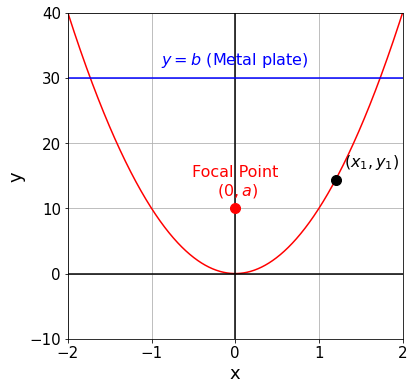

In [112]:
a = 10
xlim = [-2, 2]
x, y = parabola(a=a, xmin=xlim[0], xmax=xlim[1])
ymax = max(y)
fig, ax = plot_parabola(x, y)
ax.set_title('')
ax.plot([0,0],[-10,ymax], c='k')
ax.plot(xlim,[0,0], c='k')
ax.scatter([0],[a], marker='o', s=100, c='r', zorder=2)
x1 = 1.2
y1 = a*x1*x1
ax.scatter([x1],[y1], marker='o', s=100, c='k', zorder=2)
ax.text(0, a+2, 'Focal Point\n $(0,a)$', fontsize=16, color='r', zorder=2, ma='center', ha='center')
ax.text(x1+0.1, y1+2, '$(x_1,y_1)$', fontsize=16, zorder=2)

b = 30
ax.plot(xlim,[b,b], c='b', zorder=2)
ax.text(0, b+2, '$y=b$ (Metal plate)', fontsize=16, color='b', zorder=2, ha='center')

ax.set_xlim(xlim)
ax.set_ylim(-10, ymax)


## Check length of light path

焦点が $(0, a)$ の放物線の曲線は

$
y = \frac{1}{4a}x^2
$

で表せる。

$L_1$ を焦点から点1$(x_1, y_1)$までの距離とすると、

$
\begin{align*}
L_1^2 &= (y_1 - a)^2 + (x_1 - 0)^2 && \\
     &= (y_1 - a)^2 + x_1^2 \\
  x_1^2 = & 4ay_1  \mbox{より} \\
     &= (y_1 - a)^2 + 4ay_1 \\
     &= (y_1 + a)^2 \\
\Leftrightarrow L_1 &= y_1 + a\\
\end{align*}
$

$L_2$ を点1から $y=b$ までの垂直距離とすると($b > y_1$ とする)、

$
\begin{align}
L_2^2 &= (b - y_1)^2 + (x_1 - x_1)^2 \\
     &= (b - y_1)^2 \\
\Leftrightarrow L_2 &= b - y_1\\
\end{align}
$

よって、焦点から $y=b$ までの光路長 $L$ は

$
\begin{align}
L &= L_1 + L_2 \\
  &= (y_1 + a) + (b - y_1) \\
  &= a + b
\end{align}
$

つまり、光路長は点1の位置によらず$a+b$になる。

# Beam size before mirror

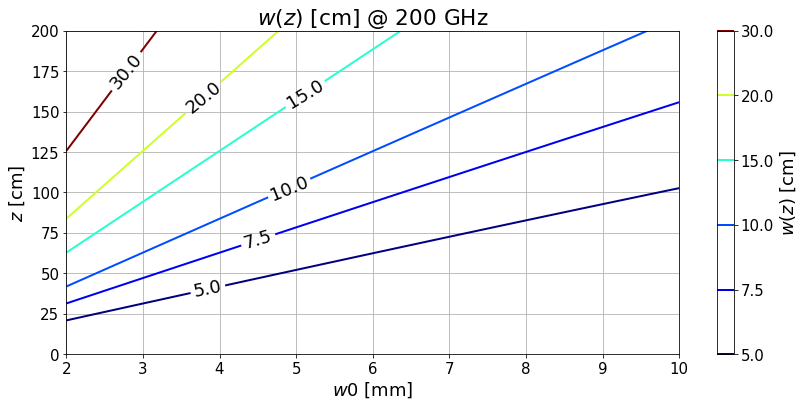

(<Figure size 864x432 with 2 Axes>,
 <Axes: title={'center': '$w(z)$ [cm] @ 200 GHz'}, xlabel='$w0$ [mm]', ylabel='$z$ [cm]'>)

In [113]:
def plot2D_w_w0vsz(freq=200*GHz):
    _wavelength = calc_wavelength( freq )
    _w0 = np.linspace(2.*mm, 10.*mm, 100)
    _z = np.linspace(0., 2., 200)

    _X, _Y = np.meshgrid(_w0, _z)
    _w = calc_beamwaist(w0=_X, z=_Y, wavelength=_wavelength)

    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    levels = [5, 7.5, 10, 15, 20, 30]
    con = ax.contour(_X/mm, _Y/cm, _w/cm, cmap='jet', vmin=5, vmax=30, levels=levels, linewidths=2)
    ax.set_xlabel('$w0$ [mm]')
    ax.set_ylabel('$z$ [cm]')
    ax.set_title(r'$w(z)$ [cm] @ '+f'{freq/GHz:.0f} GHz')
    ax.clabel(con, colors='k')
    ax.grid(True)
    fig.colorbar(con, orientation='vertical').set_label('$w(z)$ [cm]')
    #fig.savefig('2D_w0.pdf')
    fig.tight_layout()
    
    plt.show()
    
    return fig, ax

plot2D_w_w0vsz()

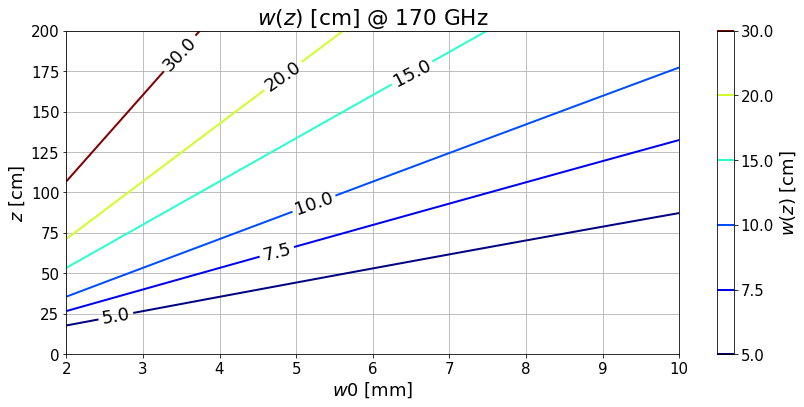

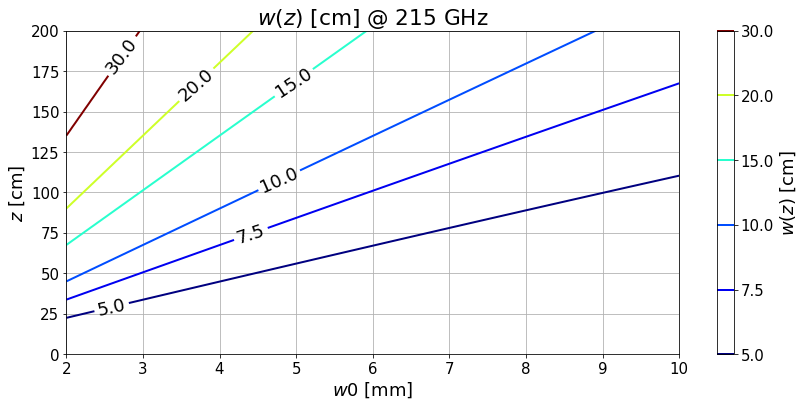

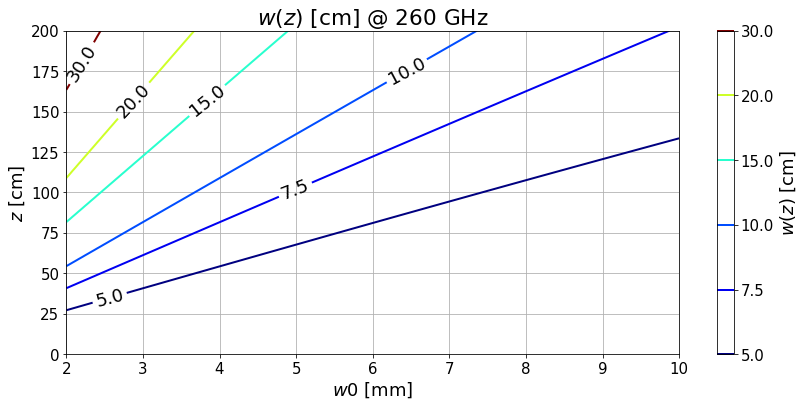

(<Figure size 864x432 with 2 Axes>,
 <Axes: title={'center': '$w(z)$ [cm] @ 260 GHz'}, xlabel='$w0$ [mm]', ylabel='$z$ [cm]'>)

In [114]:
plot2D_w_w0vsz(170*GHz)
plot2D_w_w0vsz(215*GHz)
plot2D_w_w0vsz(260*GHz)

## Distance calculated from beam waist $w0$ & beam size $w$
$$
 z = z_c \sqrt{ \left( \frac{w}{w_0} \right)^2 - 1}
$$

[1.49896229]


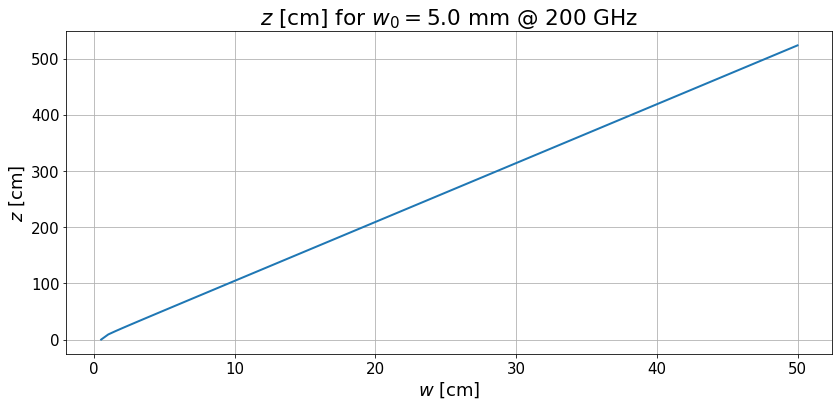

(<Figure size 864x432 with 1 Axes>,
 <Axes: title={'center': '$z$ [cm] for $w_0 = $5.0 mm @ 200 GHz'}, xlabel='$w$ [cm]', ylabel='$z$ [cm]'>,
 array([0.005     , 0.01005102, 0.01510204, ..., 0.48989796, 0.49494898,
        0.5       ]),
 [array([0.        , 0.0913696 , 0.14933232, ..., 5.13348361, 5.18641711,
         5.23935057])])

In [115]:
def plot_distance_from_beamsize(freq=200*GHz, w0=5.*mm):
    if hasattr(freq, '__iter__'):
        freq = np.array(freq)
    else:
        freq = np.array([freq])
        pass
    _wavelength = calc_wavelength( freq )
    print(_wavelength/mm)
    _w = np.linspace(w0, 50.*cm, int((50.*cm-w0)/cm*2) )
    _z_list = []
    for _wl in _wavelength:
        _z = calc_distance_from_beamsize(w=_w, w0=w0, wavelength=_wl)
        _z_list.append(_z)
        pass

    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    for i, _f in enumerate(freq):
        ax.plot(_w/cm, _z_list[i]/cm, label=f'@ {_f/GHz:.0f} GHz', lw=2)
        pass
    ax.set_xlabel('$w$ [cm]')
    ax.set_ylabel('$z$ [cm]')
    if len(freq) == 1:
        ax.set_title(r'$z$ [cm] for $w_0 = $' + f'{w0/mm:.1f} mm @ {freq[0]/GHz:.0f} GHz')
    else:
        ax.set_title(r'$z$ [cm] for $w_0 = $' + f'{w0/mm:.1f} mm')
        ax.legend()
        pass
    ax.grid(True)
    #fig.savefig('distance_from_beamsize.pdf')
    fig.tight_layout()
    
    plt.show()
    
    return fig, ax, _w, _z_list

plot_distance_from_beamsize()

[1.76348505]


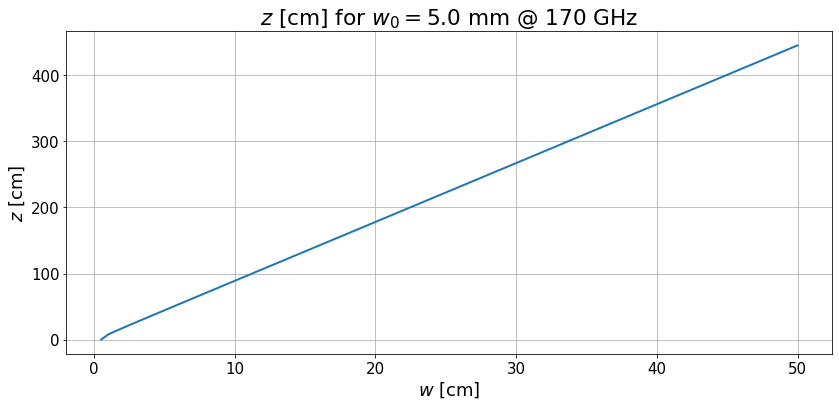

[1.39438353]


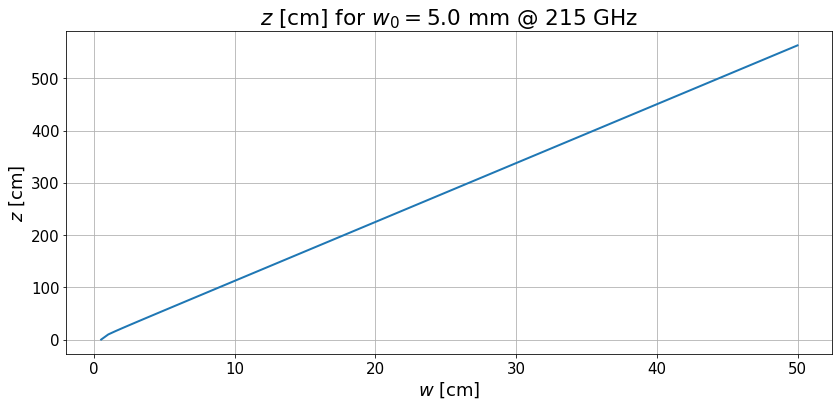

[1.15304792]


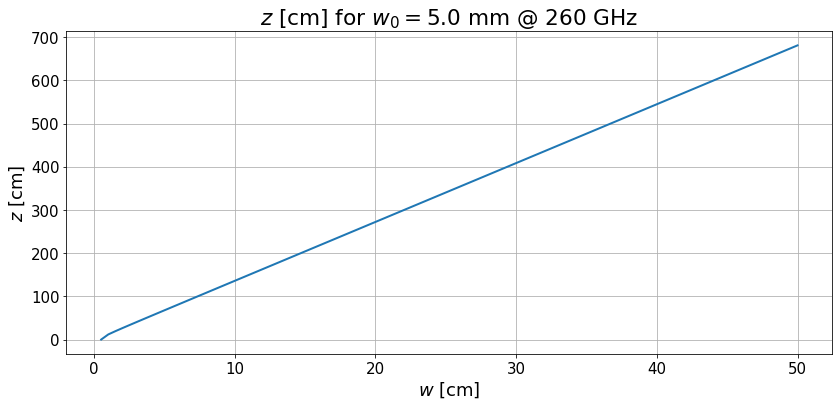

(<Figure size 864x432 with 1 Axes>,
 <Axes: title={'center': '$z$ [cm] for $w_0 = $5.0 mm @ 260 GHz'}, xlabel='$w$ [cm]', ylabel='$z$ [cm]'>,
 array([0.005     , 0.01005102, 0.01510204, ..., 0.48989796, 0.49494898,
        0.5       ]),
 [array([0.        , 0.11878047, 0.19413201, ..., 6.67352869, 6.74234225,
         6.81115574])])

In [116]:
_w0 = 5.*mm
plot_distance_from_beamsize(w0=_w0, freq=170.*GHz)
plot_distance_from_beamsize(w0=_w0, freq=215.*GHz)
plot_distance_from_beamsize(w0=_w0, freq=260.*GHz)

[1.76348505 1.39438353 1.15304792]


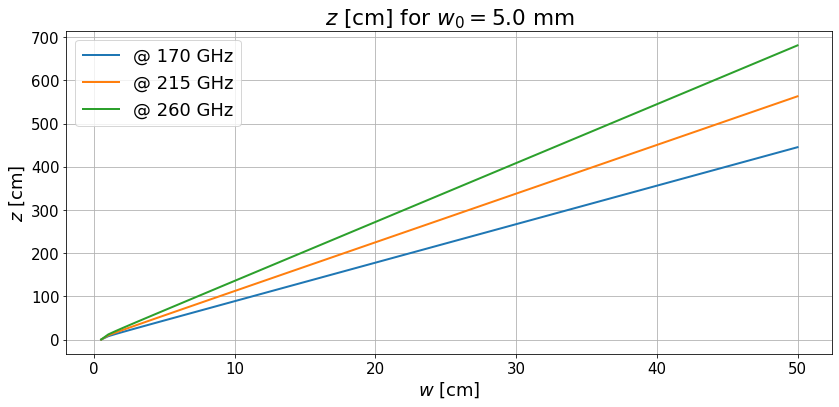

In [117]:
tmp, tmp, _w, _z_list = plot_distance_from_beamsize(w0=_w0, freq=[170.*GHz, 215.*GHz, 260.*GHz])

In [118]:
_i = np.where( (_w>7.4*cm) & (_w<7.6*cm) )[0]
print(f'_i = {_i}')
_ind = _i[0]
print(f'w[{_ind}] = {_w[_ind]/cm} cm')

for i in range(len(_z_list)):
    print(f'z = {_z_list[i][_ind]} m')
    pass

_i = [14]
w[14] = 7.571428571428572 cm
z = 0.6729408290160493 m
z = 0.8510722249320625 m
z = 1.0292036208480755 m


# Design parabolic mirror

0

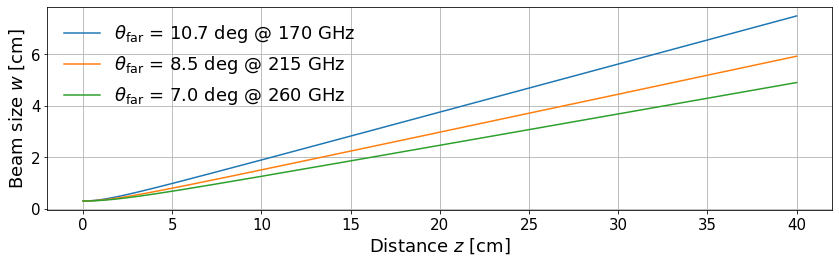

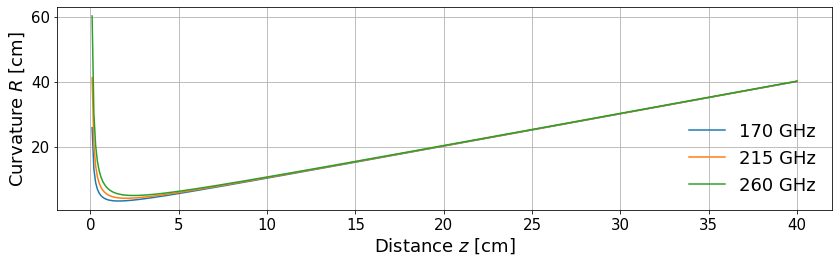

In [119]:
plot_beamwaist(w0=3*mm, zmax=40*cm, freq=[170*GHz, 215*GHz, 260*GHz])
plot_R(w0=3*mm, zmax=40*cm, freq=[170*GHz, 215*GHz, 260*GHz])

            /   LF    /    MF   /    HF
Freq        / 170 GHz / 215 GHz / 260 GHz
Wavelength  / 1.76 mm  / 1.39 mm  / 1.15 mm
Coherency   / 240.31 cm  / 190.01 cm  / 157.13 cm
Coherency/2 / 120.15 cm  / 95.01 cm  / 78.56 cm

Target w HF = 7.5 cm
  z @ HF   = 61.25440448575421 cm
  w for MF = 9.067472876116755 cm
  w for LF = 11.465333638081622 cm

*** w0 = 2.0 mm ***
z @ HF for w = 40.85444415166362 cm
  w for MF = 9.067472876116755 cm
  w for LF = 11.465333638081622 cm

*** w0 = 1.0 mm ***
z @ HF for w = 20.43267248427385 cm
  w for MF = 9.067472876116755 cm
  w for LF = 11.465333638081622 cm


0

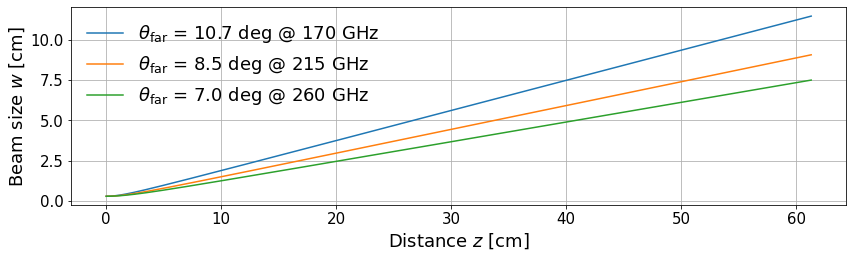

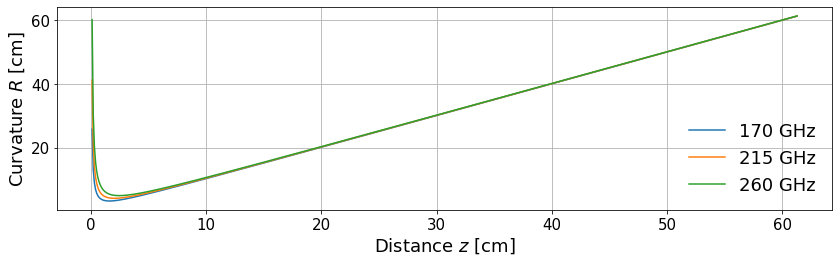

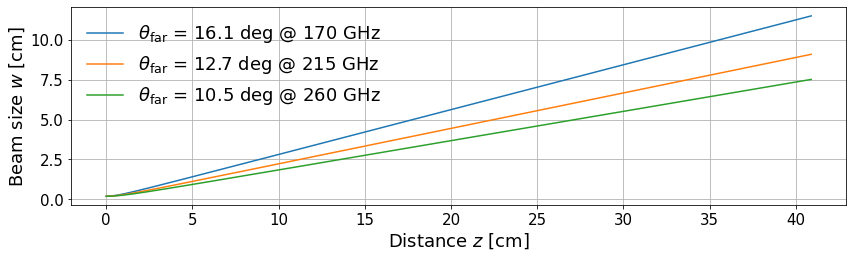

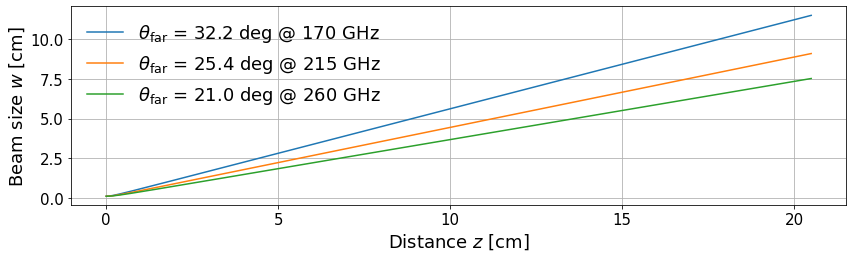

In [120]:
LF = 170*GHz
MF = 215*GHz
HF = 260*GHz
wl_LF = calc_wavelength(LF)
wl_MF = calc_wavelength(MF)
wl_HF = calc_wavelength(HF)

# Calculate coherent limit
def calc_coherent(wavelength, v_DP=220e+3):
    return c * wavelength / v_DP
coh_LF = calc_coherent(wl_LF)
coh_MF = calc_coherent(wl_MF)
coh_HF = calc_coherent(wl_HF)

# Define z from w0 and beamsize
w_HF = 15*cm/2. # coherence limit @ 260 GHz
w0 = 3*mm # Tentative value
z_HF = calc_distance_from_beamsize(w0=w0, wavelength=wl_HF, w=w_HF)
w_LF = calc_beamwaist(w0=w0, wavelength=wl_LF, z=z_HF)
w_MF = calc_beamwaist(w0=w0, wavelength=wl_MF, z=z_HF)

print(f'            /   LF    /    MF   /    HF')
print(f'Freq        / {LF/GHz:.0f} GHz / {MF/GHz:.0f} GHz / {HF/GHz:.0f} GHz')
print(f'Wavelength  / {wl_LF/mm:.2f} mm  / {wl_MF/mm:.2f} mm  / {wl_HF/mm:.2f} mm')
print(f'Coherency   / {coh_LF/cm:.2f} cm  / {coh_MF/cm:.2f} cm  / {coh_HF/cm:.2f} cm')
print(f'Coherency/2 / {coh_LF/2/cm:.2f} cm  / {coh_MF/2/cm:.2f} cm  / {coh_HF/2/cm:.2f} cm')
print()
print(f'Target w HF = {w_HF/cm} cm')
print(f'  z @ HF   = {z_HF/cm} cm')
print(f'  w for MF = {w_MF/cm} cm')
print(f'  w for LF = {w_LF/cm} cm')

plot_beamwaist(w0=w0, zmax=z_HF, freq=[170*GHz, 215*GHz, 260*GHz])
plot_R(w0=w0, zmax=z_HF, freq=[170*GHz, 215*GHz, 260*GHz])

_w0 = 2*mm
_z_HF = calc_distance_from_beamsize(w0=_w0, wavelength=wl_HF, w=w_HF)
_w_LF = calc_beamwaist(w0=w0, wavelength=wl_LF, z=z_HF)
_w_MF = calc_beamwaist(w0=w0, wavelength=wl_MF, z=z_HF)
print()
print(f'*** w0 = {_w0/mm} mm ***')
print(f'z @ HF for w = {_z_HF/cm} cm')
print(f'  w for MF = {_w_MF/cm} cm')
print(f'  w for LF = {_w_LF/cm} cm')
plot_beamwaist(w0=_w0, zmax=_z_HF, freq=[170*GHz, 215*GHz, 260*GHz])

_w0 = 1*mm
_z_HF = calc_distance_from_beamsize(w0=_w0, wavelength=wl_HF, w=w_HF)
_w_LF = calc_beamwaist(w0=w0, wavelength=wl_LF, z=z_HF)
_w_MF = calc_beamwaist(w0=w0, wavelength=wl_MF, z=z_HF)
print()
print(f'*** w0 = {_w0/mm} mm ***')
print(f'z @ HF for w = {_z_HF/cm} cm')
print(f'  w for MF = {_w_MF/cm} cm')
print(f'  w for LF = {_w_LF/cm} cm')
plot_beamwaist(w0=_w0, zmax=_z_HF, freq=[170*GHz, 215*GHz, 260*GHz])

In [121]:
# Spill over
spill = 0.01
func.ratio_to_dB(calc_edgeTaper(r=w_LF*1.5, w=w_LF))
r_99LF = calc_radius_from_ET(ET=spill, w=w_LF)
print(f'Radius for 99% ET = {r_99LF/cm} cm (r/w = {r_99LF/w_LF})')
print(f'Diameter for 99% ET = {r_99LF*2./cm} cm (r/w = {r_99LF/w_LF})')

Radius for 99% ET = 17.39780830987715 cm (r/w = 1.5174271293851462)
Diameter for 99% ET = 34.7956166197543 cm (r/w = 1.5174271293851462)


In [122]:
# Geometry
z_mirror = z_HF
d_plate = 60*cm
z_plate = z_mirror + d_plate

freq_mirror = calc_freq(z_mirror)
freq_plate = calc_freq(z_plate)
freq_mirror_plate = calc_freq(d_plate)

signal_dfreq_LF = LF*1e-6
signal_dfreq_HF = HF*1e-6

print(f'Standing frequency btw antenna and mirror = {freq_mirror/GHz:.2f} GHz')
print(f'Standing frequency btw antenna and plate  = {freq_plate/GHz:.2f} GHz')
print(f'Standing frequency btw mirror and plate   = {freq_mirror_plate/GHz:.2f} GHz')
print(f'Signal peak width = {signal_dfreq_LF/kHz:.2f}--{signal_dfreq_HF/kHz:.2f} kHz')
print(f'Signal peak width / Standing freq mirror       = {signal_dfreq_LF/freq_mirror*100:.3f}--{signal_dfreq_HF/freq_mirror*100:.3f} %')
print(f'Signal peak width / Standing freq plate        = {signal_dfreq_LF/freq_plate *100:.3f}--{signal_dfreq_HF/freq_plate *100:.3f} %')
print(f'Signal peak width / Standing freq mirror-plate = {signal_dfreq_LF/freq_mirror_plate *100:.1f}--{signal_dfreq_HF/freq_mirror_plate*100:.3f} %')

Standing frequency btw antenna and mirror = 0.49 GHz
Standing frequency btw antenna and plate  = 0.25 GHz
Standing frequency btw mirror and plate   = 0.50 GHz
Signal peak width = 170.00--260.00 kHz
Signal peak width / Standing freq mirror       = 0.035--0.053 %
Signal peak width / Standing freq plate        = 0.069--0.105 %
Signal peak width / Standing freq mirror-plate = 0.0--0.052 %


# Design of feed antenna

## Circular waveguide
    
Cut-off wavelength ($a$=radius of the circular waveguid):
- TE$_{11}$ mode: $3.41a$
- TE$_{01}$ mode: $1.64a$
- TM$_{11}$ mode: $1.64a$

Frequency range for r=0.6: 146.5--304.7


(146526128054.74097, 304667132113.82117)

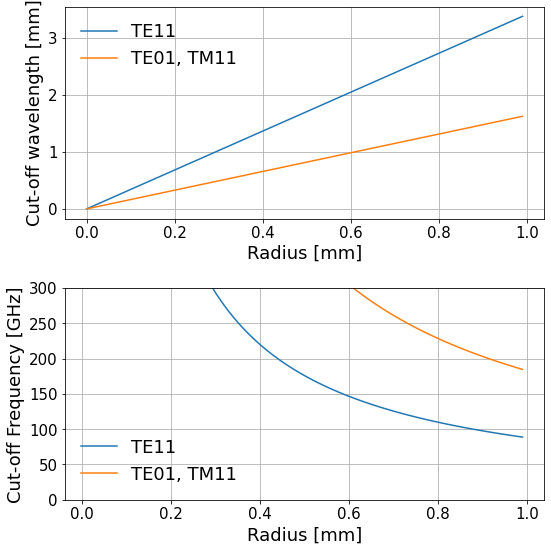

In [139]:
r_list = np.arange(0*mm, 1*mm, 0.01*mm)

fig, axs = plt.subplots(2,1,figsize=(8,8))
_ax = axs[0]
_ax.plot(r_list/mm, 3.41*r_list/mm, label='TE11')
_ax.plot(r_list/mm, 1.64*r_list/mm, label='TE01, TM11')
_ax.legend(frameon=False)
_ax.grid(True)
_ax.set_xlabel('Radius [mm]')
_ax.set_ylabel('Cut-off wavelength [mm]')

_ax = axs[1]
_ax.plot(r_list/mm, calc_freq(3.41*r_list)/GHz, label='TE11')
_ax.plot(r_list/mm, calc_freq(1.64*r_list)/GHz, label='TE01, TM11')
_ax.legend(frameon=False)
_ax.grid(True)
_ax.set_xlabel('Radius [mm]')
_ax.set_ylabel('Cut-off Frequency [GHz]')
_ax.set_ylim([0, 300])

fig.tight_layout()

def circular_waveguide_cutoff_freqs(r=0.6*mm):
    r_max = 3.41*r
    r_min = 1.64*r
    
    freq_min = calc_freq(r_max)
    freq_max = calc_freq(r_min)
    
    print(f'Frequency range for r={r/mm}: {freq_min/GHz:.1f}--{freq_max/GHz:.1f}')
    return freq_min, freq_max

circular_waveguide_cutoff_freqs(0.6*mm)

In [141]:
print(f'wavelength/2 @ 230.77 GHz = {calc_wavelength(230.77*GHz)/2./mm:.2f} mm')
print(f'wavelength/4 @ 210 GHz = {calc_wavelength(210*GHz)/4./mm:.2f} mm')

wavelength/2 @ 230.77 GHz = 0.65 mm
wavelength/4 @ 210 GHz = 0.36 mm


# Design parabolic mirror with a corrugated antenna designed by Nagoya

In [ ]:
w0_antenna = 2.6*mm
